### Categorical Data Encoding, Feature Selection and Training...

# I. Data and Preprocessing

Data source from `2019 OSMI Mental Health Survey`.

Following tasks are undertaken:
* Rename columns
* Sex columns
* Removed outliers from age column
* Deletion of columns with more than half missing values
* Column encoding

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext lab_black
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

# Data import
survey_2019 = pd.read_csv("../data/OSMI_Mental_Health_Survey_2019/OSMI_survey_2019.csv")

In [2]:
survey_2019.head()

,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",...,Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.,"If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,What country do you *work* in?,What US state or territory do you *work* in?
0,False,26-100,True,True,I don't know,No,Yes,Yes,I don't know,Very easy,...,NaN,NaN,False,25,Male,United States of America,Nebraska,White,United States of America,Nebraska
1,False,26-100,True,True,Yes,No,No,Yes,Yes,I don't know,...,NaN,NaN,False,51,male,United States of America,Nebraska,White,United States of America,Nebraska
2,False,26-100,True,True,I don't know,No,No,I don't know,I don't know,Somewhat difficult,...,I think opening up more conversation around th...,Thank you,True,27,Male,United States of America,Illinois,White,United States of America,Illinois
3,False,100-500,True,True,I don't know,No,Yes,Yes,Yes,Very easy,...,NaN,NaN,False,37,male,United States of America,Nebraska,White,United States of America,Nebraska
4,False,26-100,True,True,I don't know,No,I don't know,I don't know,I don't know,I don't know,...,NaN,NaN,False,46,m,United States of America,Nebraska,White,United States of America,Nebraska


In [3]:
new_columns = [
    "*Are you self-employed?*",
    "Do you know the options for mental health care available under your employer-provided health coverage?",
    "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?",
    "If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",
    "Would you feel more comfortable talking to your coworkers about your physical health or your mental health?",
    "Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?",
    "Have you ever discussed your mental health with your employer?",
    "Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",
    "Would you feel comfortable discussing a mental health issue with your coworkers?",
    "Have you ever discussed your mental health with coworkers?",
    "Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?",
    "Do you know local or online resources to seek help for a mental health issue?",
    "If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?",
    "If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?",
    "Do you *currently* have a mental health disorder?",
    "Have you ever been *diagnosed* with a mental health disorder?",
    "*What disorder(s) have you been diagnosed with?*",
    "*If possibly, what disorder(s) do you believe you have?*",
    "*If so, what disorder(s) were you diagnosed with?*",
    "Have you had a mental health disorder in the past?",
    "Have you ever sought treatment for a mental health disorder from a mental health professional?",
    "Do you have a family history of mental illness?",
    "If you have a mental health disorder, how often do you feel that it interferes with your work *when being treated effectively?*",
    "If you have a mental health disorder, how often do you feel that it interferes with your work *when* _*NOT*_* being treated effectively (i.e., when you are experiencing symptoms)?*",
    "How willing would you be to share with friends and family that you have a mental illness?",
    "What is your age?",
    "What is your gender?",
    "What is your race?",
]

In [4]:
survey_features = survey_2019[new_columns]

In [5]:
new_labels = [
    "self_employed_flag",
    "know_options_mh_care",
    "anonimity_of_mh_care_option(s)",
    "ease_of_taking_mh_leave",
    "comfort_talking_mh_colleague(s)",
    "comfort_talking_mh_supervisor_senior",
    "discussed_mh_flag",
    "describe_conversation_about_mh(reactions,actions)",
    "comfort_of_discussing_mh_with_colleague(s)",
    "ever_discussed_your_mh_with_coworkers?",
    "have_mh_medical coverage",
    "know_local_or_online_mh_help_resources",
    "reveal_mh_diagnosis_or_treatment_to_colleague(s)client(s)",
    "response_of_mh_diagnosis_reveal_to_client(s)_colleague(s)_relationships",
    "do_you_currently_have_a_mh_disorder?",
    "have_you_ever_been_diagnosed_with_a_mh_disorder?",
    "what_disorder(s)_have_you_been_diagnosed_with?",
    "if_possibly_what_disorder(s)_do_you_believe_you_have?",
    "if_so_what_disorder(s)_were_you_diagnosed_with?",
    "have_you_had_mh_disorder_past_phenomenology?",
    "have_you_ever_sought_professional_mental_treatment",
    "do_you_have_family_history_of_mental_illness?",
    "how_does_mental_health_disorder_interfere_with_work_under_treatment?",
    "how_does_mental_health_disorder_interfere_with_work_not_under_treatment?",
    "willing_would_you_be_to_share_mental_illness_diagnosis_with_friends_and_family?",
    "age",
    "gender",
    "race",
]

In [6]:
survey_df = survey_features.copy()
survey_df.columns = new_labels

In [7]:
survey_df.head()

,self_employed_flag,know_options_mh_care,anonimity_of_mh_care_option(s),ease_of_taking_mh_leave,comfort_talking_mh_colleague(s),comfort_talking_mh_supervisor_senior,discussed_mh_flag,"describe_conversation_about_mh(reactions,actions)",comfort_of_discussing_mh_with_colleague(s),ever_discussed_your_mh_with_coworkers?,...,if_so_what_disorder(s)_were_you_diagnosed_with?,have_you_had_mh_disorder_past_phenomenology?,have_you_ever_sought_professional_mental_treatment,do_you_have_family_history_of_mental_illness?,how_does_mental_health_disorder_interfere_with_work_under_treatment?,how_does_mental_health_disorder_interfere_with_work_not_under_treatment?,willing_would_you_be_to_share_mental_illness_diagnosis_with_friends_and_family?,age,gender,race
0,False,No,I don't know,Very easy,Physical health,Yes,False,NaN,Yes,True,...,NaN,No,False,No,Not applicable to me,Not applicable to me,8,25,Male,White
1,False,No,Yes,I don't know,Physical health,Maybe,False,NaN,Maybe,True,...,NaN,Possibly,False,Yes,Sometimes,Often,7,51,male,White
2,False,No,I don't know,Somewhat difficult,Same level of comfort for each,No,False,NaN,Maybe,True,...,NaN,No,False,I don't know,Not applicable to me,Not applicable to me,4,27,Male,White
3,False,No,Yes,Very easy,Physical health,Yes,False,NaN,Maybe,False,...,NaN,No,False,Yes,Not applicable to me,Not applicable to me,3,37,male,White
4,False,No,I don't know,I don't know,Physical health,No,False,NaN,No,False,...,NaN,No,False,No,Not applicable to me,Not applicable to me,1,46,m,White


In [8]:
survey_df.gender.value_counts()

Male                                   143
male                                    52
Female                                  49
female                                  27
M                                       15
F                                        9
m                                        8
Woman                                    4
f                                        3
None                                     2
Female                                   2
Non-binary                               2
agender                                  2
Femile                                   1
Female-identified                        1
Nonbinary                                1
woman                                    1
femmina                                  1
Cishet male                              1
Agender trans woman                      1
Non binary                               1
43                                       1
Make                                     1
Non-binary 

In [9]:
# Sex column recoded according to distinctive classes
survey_df["gender"].replace(
    to_replace=[
        "Male",
        "male",
        "M",
        "m",
        "Male ",
        "Identify as male",
        "Man",
        "Masculine",
        "Cis Male",
        "Cishet male",
        "CIS Male",
        'Let\'s keep it simple and say "male"',
        "I have a penis",
        "masculino",
        "man",
        "cis male",
    ],
    value="Male",
    inplace=True,
)

survey_df["gender"].replace(
    to_replace=[
        "Female",
        "female",
        "F",
        "Woman",
        "f",
        "Female ",
        "cis woman",
        "Female-identified",
        "femmina",
        "Femile",
        "Female (cis)",
        "woman",
    ],
    value="Female",
    inplace=True,
)

survey_df["gender"].replace(
    to_replace=[
        "None",
        "Non-binary",
        "agender",
        "Trans man",
        "I am a Wookie",
        "Questioning",
        "Agender trans woman",
        "Non-binary and gender fluid",
        "Nonbinary",
        "rr",
        "Make",
        "Non binary",
        "Trans non-binary/genderfluid",
        "43",
    ],
    value=None,
    inplace=True,
)

In [10]:
survey_df.gender.value_counts()

Male      242
Female    105
Name: gender, dtype: int64

In [11]:
survey_df.race.value_counts()

White                         173
Asian                           9
More than one of the above      8
I prefer not to answer          6
Black or African American       4
White Hispanic                  1
Hispanic                        1
Caucasian                       1
European American               1
Name: race, dtype: int64

In [12]:
# Race column recoded
survey_df["race"].replace(
    to_replace=["More than one of the above", "I prefer not to answer"],
    value=None,
    inplace=True,
)
survey_df["race"].replace(
    to_replace=["Caucasian", "European American", "White Hispanic"],
    value="White",
    inplace=True,
)

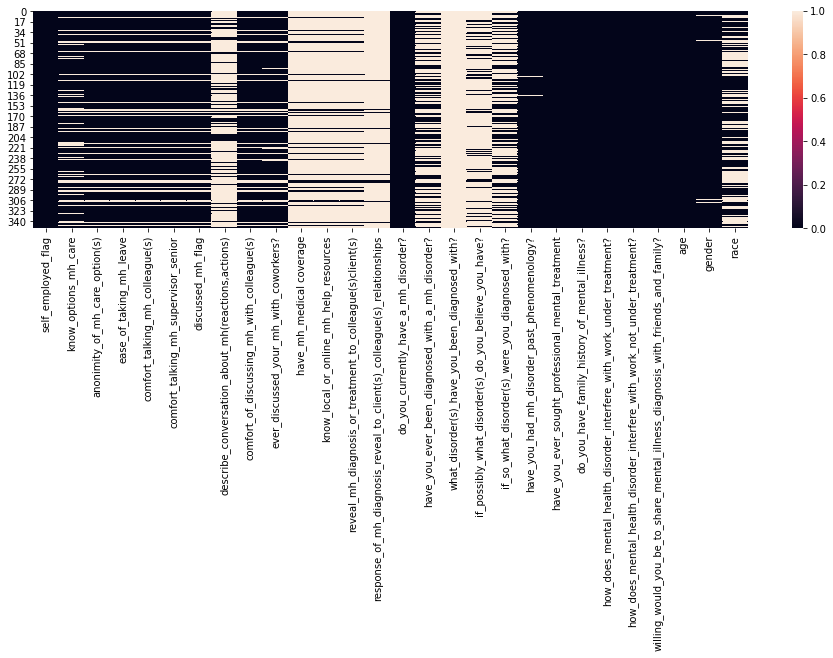

In [13]:
plt.figure(figsize=(16, 4))
sns.heatmap(data=survey_df.isna())

In [14]:
# We drop all columns where more than half of the observations have missing values
cols = (survey_df.isna().sum() >= survey_df.shape[0] / 2).tolist()
to_drop = survey_df.columns[cols]
survey_df.drop(labels=to_drop, axis=1, inplace=True)

In [15]:
# Dealing with other missing values
from sklearn.impute import SimpleImputer

# Impute nan with the most frequent value (mode) on every row
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp.fit(survey_df)
imp_data = pd.DataFrame(data=imp.transform(survey_df), columns=survey_df.columns)

In [16]:
imp_data.self_employed_flag.value_counts()

False    304
True      48
Name: self_employed_flag, dtype: int64

In [17]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 19 columns):
 #   Column                                                                           Non-Null Count  Dtype 
---  ------                                                                           --------------  ----- 
 0   self_employed_flag                                                               352 non-null    bool  
 1   know_options_mh_care                                                             278 non-null    object
 2   anonimity_of_mh_care_option(s)                                                   304 non-null    object
 3   ease_of_taking_mh_leave                                                          304 non-null    object
 4   comfort_talking_mh_colleague(s)                                                  304 non-null    object
 5   comfort_talking_mh_supervisor_senior                                             304 non-null    object
 6   discussed_mh_flag 

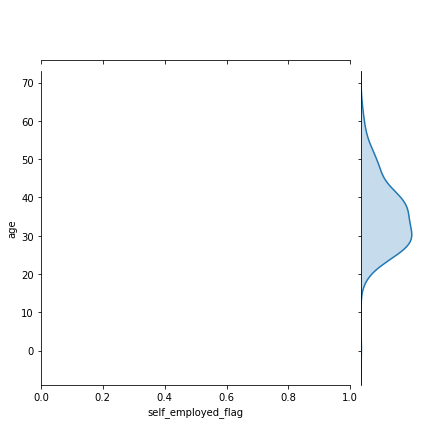

In [31]:
import seaborn as sns

# 2D KDE plot
sns.jointplot(x=survey_df["self_employed_flag"], y=survey_df["age"], kind="kde")

# II. Visualisation and Insights

In [18]:
import matplotlib as mpl

sns.set_style("whitegrid")
sns.set_palette("Set2")
mpl.rcParams["font.size"] = 16
import matplotlib.gridspec as gridspec

## Profile of the respondents

### 1. Gender 
As expected, most of the respondents are `male`, this happening only because the tech industry which the survey sources from is predominantly occupied by men.

Text(0.5, 1.0, 'Overall gender prop%')

<Figure size 1152x360 with 0 Axes>

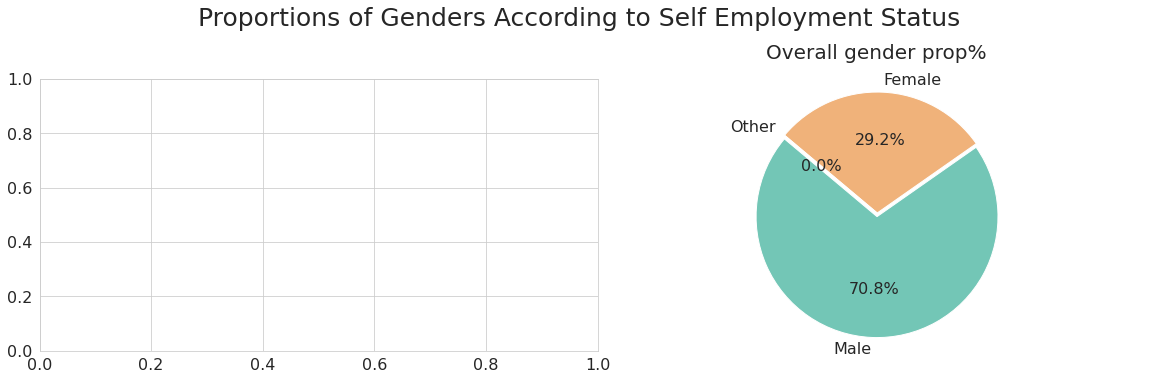

In [19]:
plt.figure(figsize=(16, 5))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace=0)
fig.suptitle(
    "Proportions of Genders According to Self Employment Status", fontsize=25, y=1.08
)

# Pie Chart
all_techs = imp_data[imp_data["self_employed_flag"] == True]["gender"].count()
males = imp_data[
    (imp_data["self_employed_flag"] == True) & (imp_data["gender"] == "Male")
]["gender"].count()
females = imp_data[
    (imp_data["self_employed_flag"] == True) & (imp_data["gender"] == "Female")
]["gender"].count()
other = imp_data[
    (imp_data["self_employed_flag"] == True) & (imp_data["gender"] == None)
]["gender"].count()

labels = "Male", "Female", "Other"
sizes = [males / all_techs, females / all_techs, other / all_techs]
colors = ["#73C6B6", "#F0B27A", "#7FB3D5"]
explode = (0.03, 0, 0)  # explode 1st slice

ax2.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%",
    shadow=False,
    startangle=140,
)
ax2.axis("equal")
ax2.set_title("Overall gender prop%", pad=20, fontsize=20)

In [16]:
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

In [ ]:
feature_columns = []

# numeric cols
for header in ['PhotoAmt', 'Fee', 'Age']:
  feature_columns.append(feature_column.numeric_column(header))

# bucketized cols
age = feature_column.numeric_column('Age')
age_buckets = feature_column.bucketized_column(age, boundaries=[1, 2, 3, 4, 5])
feature_columns.append(age_buckets)

# indicator_columns
indicator_column_names = ['Type', 'Color1', 'Color2', 'Gender', 'MaturitySize',
                          'FurLength', 'Vaccinated', 'Sterilized', 'Health']
for col_name in indicator_column_names:
  categorical_column = feature_column.categorical_column_with_vocabulary_list(
      col_name, dataframe[col_name].unique())
  indicator_column = feature_column.indicator_column(categorical_column)
  feature_columns.append(indicator_column)

# embedding columns
breed1 = feature_column.categorical_column_with_vocabulary_list(
      'Breed1', dataframe.Breed1.unique())
breed1_embedding = feature_column.embedding_column(breed1, dimension=8)
feature_columns.append(breed1_embedding)

# crossed columns
age_type_feature = feature_column.crossed_column([age_buckets, animal_type], hash_bucket_size=100)
feature_columns.append(feature_column.indicator_column(age_type_feature))

Create a feature layer

Now that we have defined our feature columns, we will use a DenseFeatures layer to input them to our Keras model.

feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

Earlier, we used a small batch size to demonstrate how feature columns worked. We create a new input pipeline with a larger batch size.

batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

Create, compile, and train the model

model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dropout(.1),
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=10)


# II. Visualisation and Insights


In [8]:
renamed_columns = ['self_employed_flag', 'no_org_employees', 'employer_tech_flag', 'org_primary_role', 'employer_provide_mh_benefits', 'options_mh_care_coverage_flag', 'employer_discussed_mh', 'employer_offer_mh_resources', 'anonymity_mh_treatment_flag', 'mh_leave_flag', 'comfort_discuss_mh_coworkers', 'comfort_discuss_mh_supervisor', 'discuss_mh_employer_flag', 'Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.', 'Would you feel comfortable discussing a mental health issue with your coworkers?', 'Have you ever discussed your mental health with coworkers?', 'Describe the conversation with coworkers you had about your mental health including their reactions.', "Have you ever had a coworker discuss their or another coworker's mental health with you?", 'Describe the conversation your coworker had with you about their mental health (please do not use names).', 'Overall, how much importance does your employer place on physical health?', 'Overall, how much importance does your employer place on mental health?', 'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?', 'Do you know local or online resources to seek help for a mental health issue?', 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?', 'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?', 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?', 'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?', 'Do you believe your productivity is ever affected by a mental health issue?', 'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?', '*Do you have previous employers?*', 'Was your employer primarily a tech company/organization?', 'Have your previous employers provided mental health benefits?', 'Were you aware of the options for mental health care provided by your previous employers?', 'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?', 'Did your previous employers provide resources to learn more about mental health disorders and how to seek help?', 'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?', 'Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?', 'Would you have been willing to discuss your mental health with your direct supervisor(s)?', 'Did you ever discuss your mental health with your previous employer?', 'Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.', 'Would you have been willing to discuss your mental health with your coworkers at previous employers?', 'Did you ever discuss your mental health with a previous coworker(s)?', 'Describe the conversation you had with your previous coworkers about your mental health including their reactions.', "Did you ever have a previous coworker discuss their or another coworker's mental health with you?", 'Describe the conversation your coworker had with you about their mental health (please do not use names)..1', 'Overall, how much importance did your previous employer place on physical health?', 'Overall, how much importance did your previous employer place on mental health?', 'Do you *currently* have a mental health disorder?', 'Have you ever been *diagnosed* with a mental health disorder?', '*What disorder(s) have you been diagnosed with?*', '*If possibly, what disorder(s) do you believe you have?*', '*If so, what disorder(s) were you diagnosed with?*', 'Have you had a mental health disorder in the past?', 'Have you ever sought treatment for a mental health disorder from a mental health professional?', 'Do you have a family history of mental illness?', 'If you have a mental health disorder, how often do you feel that it interferes with your work *when being treated effectively?*', 'If you have a mental health disorder, how often do you feel that it interferes with your work *when* _*NOT*_* being treated effectively (i.e., when you are experiencing symptoms)?*', 'Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?', 'How willing would you be to share with friends and family that you have a mental illness?', 'Would you be willing to bring up a physical health issue with a potential employer in an interview?', 'Why or why not?', 'Would you bring up your *mental* health with a potential employer in an interview?', 'Why or why not?.1', 'Are you openly identified at work as a person with a mental health issue?', 'Has being identified as a person with a mental health issue affected your career?', 'How has it affected your career?', 'If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?', 'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?', 'Describe the circumstances of the badly handled or unsupportive response.', 'Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?', 'Describe the circumstances of the supportive or well handled response.', 'Overall, how well do you think the tech industry supports employees with mental health issues?', 'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.', 'If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.', 'Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.)', 'What is your age?', 'What is your gender?', 'What country do you *live* in?', 'What US state or territory do you *live* in?', 'What is your race?', 'What country do you *work* in?', 'What US state or territory do you *work* in?']